# Analysis of IMDB Movies Dataset

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies=pd.read_csv('./movies.csv')
movies.tail()

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [3]:
movies.dtypes
#movies.isnull().any()

movieId     int64
title      object
genres     object
dtype: object

In [4]:
ratings=pd.read_csv('./ratings.csv')
ratings.tail()

,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [5]:
ratings.dtypes
#ratings.isnull().any()

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [6]:
tags=pd.read_csv('./tags.csv',dtype={'tag':str})
del tags['userId']
del tags['timestamp']
tags['tag'].astype('str')
tags.head()

C:\Users\Himanshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,movieId,tag
0,4141,Mark Waters
1,208,dark hero
2,353,dark hero
3,521,noir thriller
4,592,dark hero


In [7]:
tags=tags.dropna()
#tags.isnull().any()
tags.dtypes

movieId     int64
tag        object
dtype: object

In [8]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres.tail()

,0,1,2,3,4,5,6,7,8,9
27273,Comedy,None,None,None,None,None,None,None,None,None
27274,Comedy,None,None,None,None,None,None,None,None,None
27275,Adventure,None,None,None,None,None,None,None,None,None
27276,(no genres listed),None,None,None,None,None,None,None,None,None
27277,Adventure,Fantasy,Horror,None,None,None,None,None,None,None


In [9]:
genres=movie_genres[0].unique()
genres=genres[genres!=np.array(None)]
genres=np.delete(genres,19)
genres
#type(genres)

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical', 'IMAX'], dtype=object)

In [10]:
avg_ratings=ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
del avg_ratings['timestamp']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [11]:
count_ratings=ratings.groupby('movieId', as_index=False).count()
del count_ratings['userId']
del count_ratings['timestamp']
count_ratings.columns.values[1]='count'
count_ratings.head()

,movieId,count
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161


In [12]:
final=movies.merge(avg_ratings, on='movieId', how='inner')
final=final.merge(count_ratings, on='movieId', how='inner')
final.head()

,movieId,title,genres,rating,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161


In [13]:
genre_count=[]
genre_mean=[]
genre_reviews=[]
for genre in genres:
    genre_ratings=final[final['genres'].str.contains(genre)]
    genre_count.append(len(genre_ratings['rating']))
    genre_mean.append(genre_ratings['rating'].mean()/genre_ratings['rating'].std())
    genre_reviews.append(genre_ratings['count'].mean()/genre_ratings['count'].std())
    
genre_count=np.array(genre_count)
genre_mean_ratings=np.array(genre_mean)
genre_mean_reviews=np.array(genre_reviews)

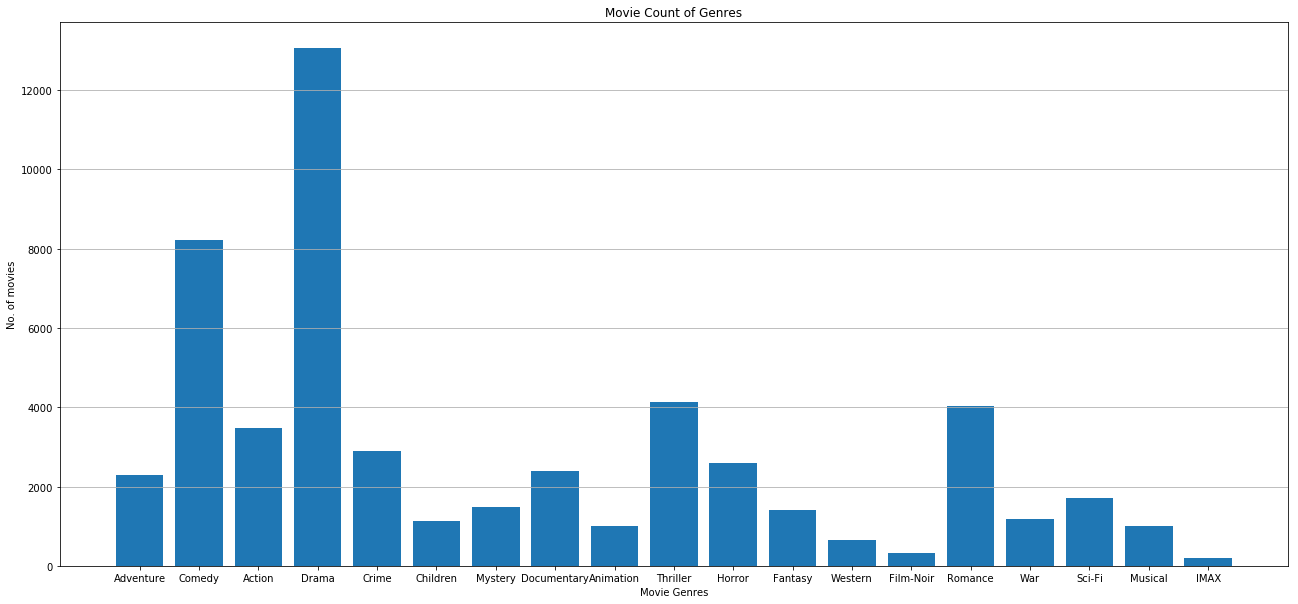

In [14]:
plt.figure(figsize=(22,10))
plt.bar([i for i in range(1,20)],genre_count)
plt.xticks([i for i in range(1,20)],genres)
ax = plt.axes()
ax.yaxis.grid(True)
plt.title('Movie Count of Genres')
plt.xlabel('Movie Genres')
plt.ylabel('No. of movies')
plt.show()

In [15]:
genres[genre_count>1500]

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Documentary',
       'Thriller', 'Horror', 'Romance', 'Sci-Fi'], dtype=object)

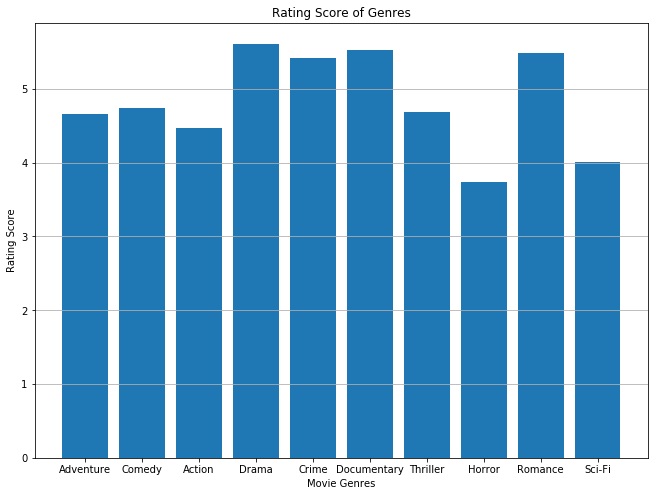

In [16]:
plt.figure(figsize=(11,8))
plt.bar([i for i in range(1,11)],genre_mean_ratings[genre_count>1500])
plt.xticks([i for i in range(1,11)],genres[genre_count>1500])
ax = plt.axes()
ax.yaxis.grid(True)
plt.title('Rating Score of Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Rating Score')
plt.show()

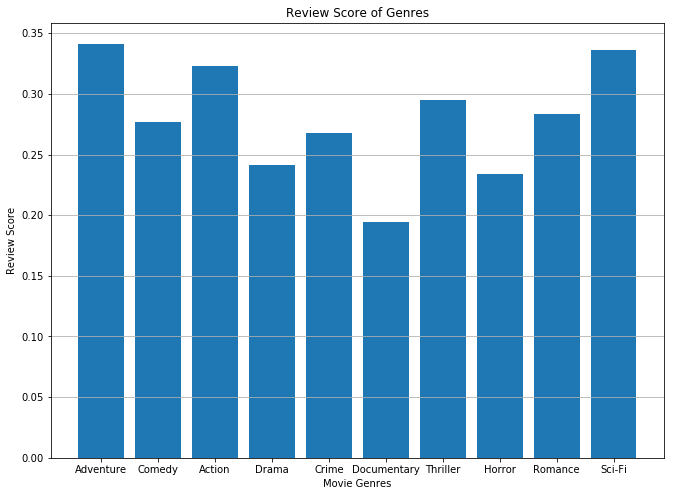

In [17]:
plt.figure(figsize=(11,8))
plt.bar([i for i in range(1,11)],genre_mean_reviews[genre_count>1500])
plt.xticks([i for i in range(1,11)],genres[genre_count>1500])
ax = plt.axes()
ax.yaxis.grid(True)
plt.title('Review Score of Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Review Score')
plt.show()

In [18]:
movie_tags=tags.groupby('movieId',as_index=False).sum()
movie_tags['tags']=tags.groupby('movieId',as_index=False)['tag'].apply(lambda x: ', '.join(x.unique()))
del movie_tags['tag']
movie_tags.head()

,movieId,tags
0,1,"Watched, computer animation, Disney animated f..."
1,2,"time travel, adapted from:book, board game, ch..."
2,3,"old people that is actually funny, sequel feve..."
3,4,"chick flick, revenge, characters, CLV"
4,5,"Diane Keaton, family, sequel, Steve Martin, we..."


In [19]:
final=final.merge(movie_tags, on='movieId', how='inner')
final.tail()

,movieId,title,genres,rating,count,tags
19006,131054,Dinotopia: Quest for the Ruby Sunstone (2005),Children|Fantasy|Sci-Fi,2.0,1,dinosaurs
19007,131082,Playground (2009),(no genres listed),4.5,1,"documentary, Yoshitomo Nara"
19008,131164,Vietnam in HD (2011),War,4.0,1,Vietnam War
19009,131170,Parallels (2015),Sci-Fi,3.5,1,alternate reality
19010,131258,The Pirates (2014),Adventure,2.5,1,"bandits, Korea, mutiny, pirates, whale"


In [20]:
all_tags=tags.groupby('tag',as_index=False).count()
std_tags=all_tags['tag'][all_tags['movieId']>500].apply(lambda x: re.escape(x))

In [21]:
tag_count=[]
tag_mean=[]
tag_reviews=[]
for tag in std_tags:
    tag_ratings=final[final['tags'].str.contains(tag)]
    tag_count.append(len(tag_ratings['rating']))
    tag_mean.append(tag_ratings['rating'].mean()/tag_ratings['rating'].std())
    tag_reviews.append(tag_ratings['count'].mean()/tag_ratings['count'].std())
    
tag_count=np.array(tag_count)
tag_mean_ratings=np.array(tag_mean)
tag_mean_reviews=np.array(tag_reviews)

In [22]:
genre_rating_mask=(final['genres'].str.contains('Drama'))#|(final['genres'].str.contains('War'))
genre_review_mask=(final['genres'].str.contains('Adventure'))#|(final['genres'].str.contains('Sci-Fi'))

In [23]:
tag_rating_filter=std_tags[(tag_mean_ratings>10.8)&(tag_count>200)]
tag_review_filter=std_tags[(tag_mean_reviews>0.7)&(tag_count>200)]

tag_rating_mask=final['tags'].str.contains(tag_rating_filter.iloc[0])
for tag in tag_rating_filter:
    tag_rating_mask=(tag_rating_mask)|(final['tags'].str.contains(tag))
    
tag_review_mask=final['tags'].str.contains(tag_review_filter.iloc[0])
for tag in tag_rating_filter:
    tag_review_mask=(tag_review_mask)|(final['tags'].str.contains(tag))

In [24]:
tag_rating_filter

20143    based\ on\ a\ true\ story
24194              erlend\'s\ DVDs
26075            great\ soundtrack
27064               imdb\ top\ 250
31237                    overrated
Name: tag, dtype: object

In [25]:
tag_review_filter

18576                 adventure
21882                   classic
26075         great\ soundtrack
27064            imdb\ top\ 250
31237                 overrated
33906    seen\ more\ than\ once
Name: tag, dtype: object

In [26]:
filtered_movies=final[((genre_rating_mask)|(tag_rating_mask))&((genre_review_mask)|(tag_review_mask))]
filtered_movies[(filtered_movies['rating']>4)&(filtered_movies['count']>20000)]

,movieId,title,genres,rating,count,tags
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493,43249,"atmospheric, psychology, serial killer, BFI mo..."
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372,47006,"organized crime, twist ending, twists & turns,..."
100,110,Braveheart (1995),Action|Drama|War,4.042534,53769,"drama, historical, Medieval, mel gibson, Nudit..."
101,111,Taxi Driver (1976),Crime|Drama|Thriller,4.110576,24481,"BFI classic, killer-as-protagonist(?), psychop..."
229,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.190672,54502,"1970s, fantasy, sci-fi, epic, exciting, galact..."
257,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4.050574,25804,"Ei muista, assassin, assassin-in-training, Bec..."
258,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.174231,67310,"acting, action, Black comedy, cult film, drugs..."
276,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.446990,63366,"friendship, masterplan, Morgan Freeman, prison..."
312,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.029000,66172,"bittersweet, classic, vietnam war, historical,..."
462,527,Schindler's List (1993),Drama|War,4.310175,50054,"black and white, hitler, World War II, Holocau..."


In [27]:
len(movies)

27278

In [28]:
len(final[(final['rating']>4)&(final['count']>20000)])

48

In [29]:
len(filtered_movies[(filtered_movies['rating']>4)&(filtered_movies['count']>20000)])

48

In [31]:
len(filtered_movies)

1786

# End